<a href="https://colab.research.google.com/github/Abhi-gola/Fruit-classifier/blob/main/model%20code/fruit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-u31h_k82
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-u31h_k82
     |████████████████████████████████| 954 kB 5.2 MB/s 
     |████████████████████████████████| 356 kB 44.6 MB/s 
     |████████████████████████████████| 138 kB 49.7 MB/s 
     |████████████████████████████████| 3.5 MB 34.5 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15969 sha256=b56fd1f6e7f9d837e9d841b4f9b166c99c350376275322ebdd36cdebd2b4a51f
  Stored in directory: /tmp/pip-ephem-wheel-cache-wri7morc/wheels/79/5c/d2/2569a4f55ff29b3c4d6b1114d5110a70a79afbf381e6eb3e87
Successfully built google-images-download
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uni

In [2]:
from google_images_download import google_images_download

#instantiate the class
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"guava, orange fruit",
             "limit":100,"print_urls":False}
paths = response.download(arguments)


Item no.: 1 --> Item name = guava
Evaluating...
Starting Download...
Completed Image ====> 1.white-guava-for-babies-scaled.jpg
Completed Image ====> 2.guava-promo.jpg
Completed Image ====> 3.1200px-guava_id.jpg
Completed Image ====> 4.5616.jpg
Completed Image ====> 5.what-does-guava-taste-like-1200x675.jpg
Completed Image ====> 6.000321165.webp
Completed Image ====> 7.guava_tree_7_fgt_650x.jpg
Completed Image ====> 8.guava-soft-for-babies-scaled.jpg
Completed Image ====> 9.guava.png
Completed Image ====> 10.benefits-of-guavas-732x549-thumbnail-732x549.jpg
Completed Image ====> 11.guava%2006192017.jpg
Completed Image ====> 12.guava%c2%a9istock.jpg
Completed Image ====> 13.pink-guava_m.jpg
Completed Image ====> 14.guava-stock-2-600x600.jpg
Completed Image ====> 15.guava_tree_4_bb_720x.jpg
Completed Image ====> 16.pummelo-raw-vs-guava.jpg
Completed Image ====> 17.different-types-of-guava-with-images-1200x675.jpg
URLError on an image...trying next one... Error: HTTP Error 404: Not Found
C

In [3]:
import os
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


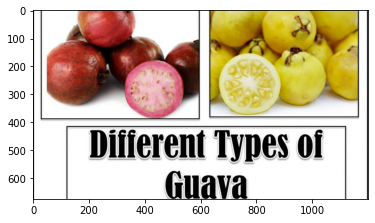

In [4]:
img = image.load_img('/content/downloads/guava/17.different-types-of-guava-with-images-1200x675.jpg')
plt.imshow(img)

In [5]:
!pip install split-folders

In [6]:
!mkdir fruits_val

In [7]:
import splitfolders
input_folder = '/content/downloads'

splitfolders.ratio(input_folder, output='fruits_val',
                   ratio=(.8, .2),
                   group_prefix=None)



Copying files: 195 files [00:00, 1898.09 files/s]


In [8]:
import cv2
import numpy as np
sdir= r'/content/fruits_val/train' 
ext='jpg' 
prefix='aug' 
batch_size=32 
passes=50 
datagen = ImageDataGenerator( rotation_range=45, width_shift_range=0.2, height_shift_range=0.2, shear_range = 0.2,
                                zoom_range = 0.2,  horizontal_flip=True, fill_mode = 'reflect')
data=datagen.flow_from_directory(directory = sdir, batch_size = batch_size,  target_size = (256, 256),
                                 color_mode = 'rgb', shuffle=True)
for i in range (passes):
    images, labels=next(data)
    class_dict=data.class_indices
    new_dict={}
    # make a new dictionary with keys and values reversed
    for key, value in class_dict.items(): # dictionary is now {numeric class label: string of class_name}
        new_dict[value]=key    
    for j in range (len(labels)):                
        class_name = new_dict[np.argmax(labels[j])]         
        dir_path=os.path.join(sdir,class_name )         
        new_file=prefix + '-' +str(i*batch_size +j) + '.'  + ext       
        img_path=os.path.join(dir_path, new_file)        
        img=cv2.cvtColor(images[j], cv2.COLOR_BGR2RGB)
        cv2.imwrite(img_path, img)
print ('*** process complete')  

Found 149 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


*** process complete


In [9]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [10]:
train = ImageDataGenerator(rescale=1./255)
val = ImageDataGenerator(rescale=1./255)

In [11]:
train_data = train.flow_from_directory('/content/fruits_val/train', target_size=(200,200),
                                       batch_size=20, shuffle=True,
                                       class_mode="binary")
val_data = val.flow_from_directory('/content/fruits_val/val', target_size=(200,200),
                                       batch_size=20, shuffle=True,
                                       class_mode="binary")

Found 1639 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [12]:
train_data.class_indices

{' orange fruit': 0, 'guava': 1}

In [33]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), padding='same', 
                                                           kernel_regularizer=regularizers.l2(1e-2), 
                                                           activation='relu',input_shape=(200,200,3)),
                                     
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), padding = 'same',
                                                           kernel_regularizer=regularizers.l2(1e-2),
                                                           activation='relu'),
                                     
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3), padding='same',
                                                           kernel_regularizer=regularizers.l2(1e-2),
                                                           activation='relu'),
                                     
                                    tf.keras.layers.MaxPool2D(2,2),  
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu', 
                                                          kernel_regularizer=regularizers.l2(1e-3)),
                                    tf.keras.layers.Dropout(0.4), 
                                    tf.keras.layers.Dense(1, activation='sigmoid')                                 
])

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer = ('adam'),
              metrics = ['acc'])

In [27]:
model_fit = model.fit(train_data, 
                      steps_per_epoch = 30,
                      epochs=40,
                      validation_data=val_data)

Epoch 1/40
 7/30 [======>.......................] - ETA: 2s - loss: 4.5447 - acc: 0.5000

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 7s 212ms/step - loss: 2.7022 - acc: 0.5209 - val_loss: 1.8393 - val_acc: 0.5000
Epoch 2/40
30/30 [==============================] - 5s 177ms/step - loss: 1.3492 - acc: 0.8247 - val_loss: 1.3881 - val_acc: 0.8000
Epoch 3/40
18/30 [=================>............] - ETA: 1s - loss: 0.9382 - acc: 0.9499

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


30/30 [==============================] - 5s 158ms/step - loss: 0.8710 - acc: 0.9533 - val_loss: 1.1186 - val_acc: 0.8250
Epoch 4/40
30/30 [==============================] - 6s 186ms/step - loss: 0.8145 - acc: 0.9317 - val_loss: 1.1540 - val_acc: 0.8250
Epoch 5/40
30/30 [==============================] - 5s 166ms/step - loss: 0.6771 - acc: 0.9400 - val_loss: 1.3091 - val_acc: 0.8250
Epoch 6/40
30/30 [==============================] - 6s 195ms/step - loss: 0.5616 - acc: 0.9783 - val_loss: 1.1422 - val_acc: 0.8250
Epoch 7/40
30/30 [==============================] - 5s 166ms/step - loss: 0.5366 - acc: 0.9667 - val_loss: 1.2139 - val_acc: 0.8250
Epoch 8/40
30/30 [==============================] - 6s 187ms/step - loss: 0.5164 - acc: 0.9617 - val_loss: 0.5616 - val_acc: 0.9250
Epoch 9/40
30/30 [==============================] - 6s 182ms/step - loss: 0.4796 - acc: 0.9617 - val_loss: 0.4995 - val_acc: 0.9500
Epoch 10/40
30/30 [==============================] - 6s 189ms/step - loss: 0.4287 - acc

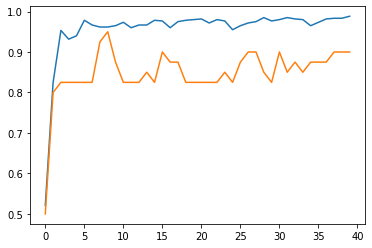

In [28]:
acc = model_fit.history['acc']
val_acc = model_fit.history['val_acc']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs_range = range(40)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

In [29]:
val_data.class_indices

{' orange fruit': 0, 'guava': 1}

In [30]:

!mkdir test

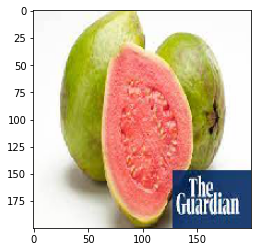

[[1.]]
This is an guava


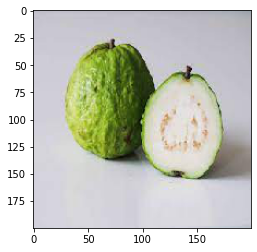

[[1.]]
This is an guava


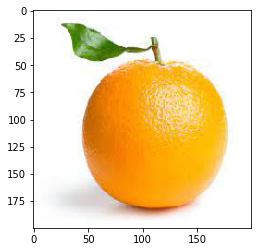

[[0.]]
This is a orange


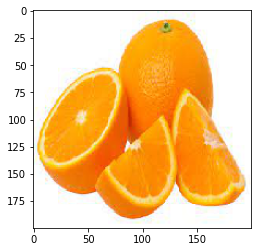

[[0.]]
This is a orange


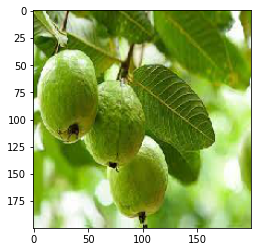

[[1.]]
This is an guava


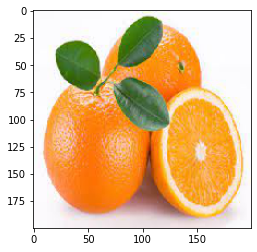

[[0.]]
This is a orange


In [32]:
dir_path = '/content/test'

for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  print(val)
  if val[0][0]==0:
    print("This is a orange")
  elif val[0][0]==1:
    print("This is an guava")
  